### Task-1 : Data preprocessing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
train_df=pd.read_csv("D:\Data Science\Course 11\DS3_C1_S4_DailyDelhiClimateTrain_Data_Practice (1).csv",index_col='date',parse_dates=True)
test_df=pd.read_csv("D:\Data Science\Course 11\DS3_C1_S4_DailyDelhiClimateTest_Data_Practice (1).csv",index_col='date',parse_dates=True)

In [3]:
train=train_df['meantemp']
test=test_df['meantemp']

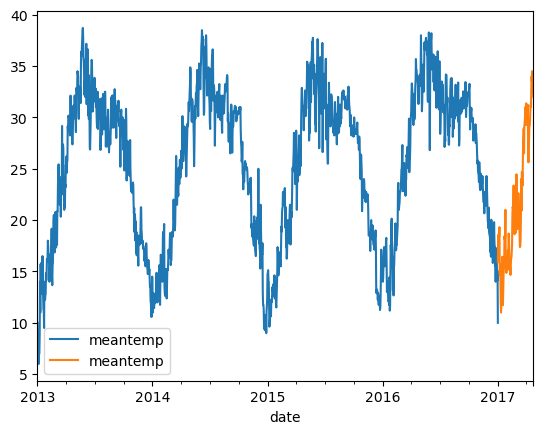

In [4]:
train.plot(legend=True)
test.plot(legend=True);

In [5]:
train=train.resample('W').mean()
train

date
2013-01-06     7.705556
2013-01-13    12.343537
2013-01-20    13.642857
2013-01-27    12.329592
2013-02-03    15.736905
                ...    
2016-12-04    20.428841
2016-12-11    18.318229
2016-12-18    17.871140
2016-12-25    17.123006
2017-01-01    15.085173
Freq: W-SUN, Name: meantemp, Length: 209, dtype: float64

In [6]:
test=test.resample('W').mean()
test

date
2017-01-01    15.913043
2017-01-08    17.487247
2017-01-15    13.191727
2017-01-22    14.732486
2017-01-29    17.239193
2017-02-05    16.839757
2017-02-12    15.661508
2017-02-19    19.402628
2017-02-26    19.976190
2017-03-05    21.542125
2017-03-12    20.114572
2017-03-19    21.368346
2017-03-26    26.871429
2017-04-02    30.203515
2017-04-09    28.805189
2017-04-16    29.820862
2017-04-23    33.511508
2017-04-30    32.000000
Freq: W-SUN, Name: meantemp, dtype: float64

#### 4)Check for stationary 

In [7]:
from statsmodels.tsa.stattools import adfuller
def checkStationarity(data):
    pvalue = adfuller(data)[1]
    print(pvalue)
    if pvalue < 0.05:
        msg = "pvalue={}. Data is Stationary. Proceed to model building".format(pvalue)
    else:
        msg = "pvalue={}. Data is not Stationary. Make the data stationary before model building".format(pvalue)

    return msg

In [8]:
# Stationary check for train dataset
checkStationarity(train)

6.898378388762609e-05


'pvalue=6.898378388762609e-05. Data is Stationary. Proceed to model building'

In [9]:
# Stationary check for test dataset
checkStationarity(test)

0.9363213685317269


'pvalue=0.9363213685317269. Data is not Stationary. Make the data stationary before model building'

#### 5) Plot ACF and PACF

In [10]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

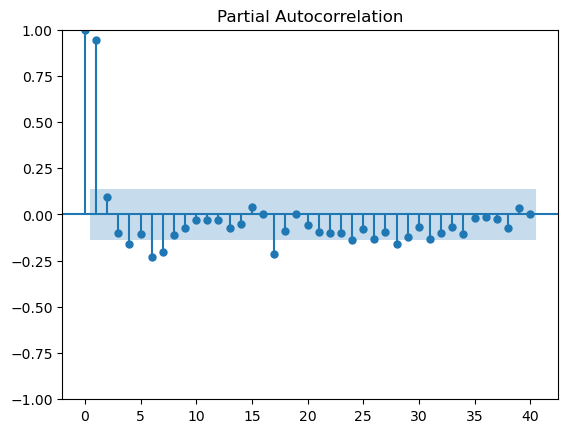

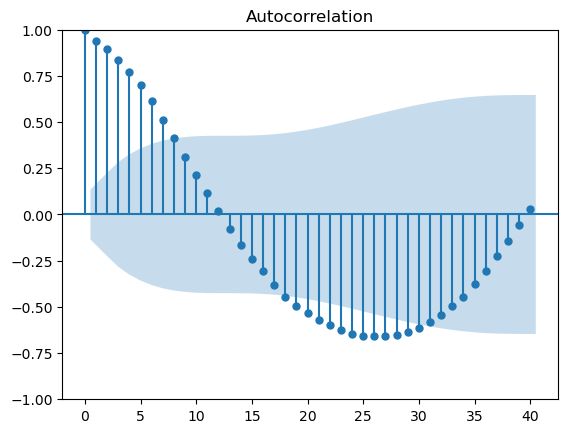

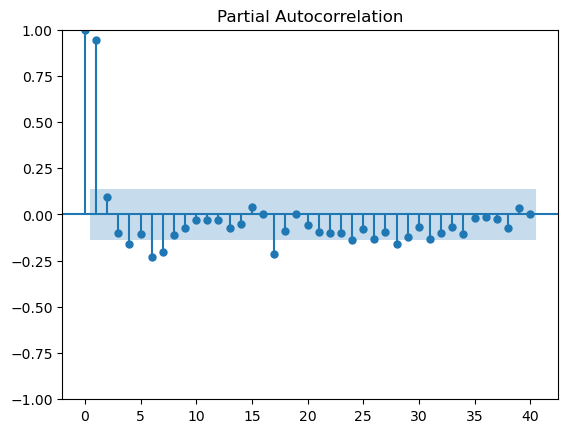

In [11]:
plot_acf(train,lags=40)
plot_pacf(train,lags=40)

In [12]:
from statsmodels.tsa.arima.model import ARIMA
ar_model=ARIMA(train,order=(5,0,0)).fit()
ar_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               meantemp   No. Observations:                  209
Model:                 ARIMA(5, 0, 0)   Log Likelihood                -438.295
Date:                Wed, 01 Mar 2023   AIC                            890.590
Time:                        14:55:07   BIC                            913.986
Sample:                    01-06-2013   HQIC                           900.049
                         - 01-01-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         23.8531      2.320     10.282      0.000      19.306      28.400
ar.L1          0.8866      0.064     13.921      0.000       0.762       1.011
ar.L2          0.2163      0.093      2.336      0.019       0.035       0.398
ar.L3          0.0250      0.091      0.274      0.784      -0.154       0.204
ar.L4         -0.0014      0.101     -0.014      0.989      -0.199       0.196
ar.L5         -0.1771      0.074     -2.406      0.016      -0.321      -0.033
sigma2         3.8247      0.407      9.387      0.000       3.026       4.623
===================================================================================
Ljung-Box (L1) (Q):                   1.55   Jarque-Bera (JB):                 1.60
Prob(Q):                              0.21   Prob(JB):                         0.45
Heteroskedasticity (H):               0.75   Skew:                            -0.20
Prob(H) (two-sided):                  0.24   Kurtosis:                         2.84
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [13]:
for i in range(1,19):
    ma_model=ARIMA(train,order=(0,0,i)).fit()
    print(ma_model.summary())

                               SARIMAX Results                                
Dep. Variable:               meantemp   No. Observations:                  209
Model:                 ARIMA(0, 0, 1)   Log Likelihood                -607.626
Date:                Wed, 01 Mar 2023   AIC                           1221.251
Time:                        14:55:07   BIC                           1231.278
Sample:                    01-06-2013   HQIC                          1225.305
                         - 01-01-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         25.4140      0.593     42.883      0.000      24.252      26.576
ma.L1          0.8192      0.049     16.590      0.000       0.722       0.916
sigma2        19.5197      2.284      8.545      0.0

### Task-2 Build the ARIMA model

#### 1) Define function to build the ARIMA model and predict temperatures.

In [14]:
arima=ARIMA(train,order=(5,0,16)).fit()
print(arima.summary())

                               SARIMAX Results                                
Dep. Variable:               meantemp   No. Observations:                  209
Model:                ARIMA(5, 0, 16)   Log Likelihood                -417.268
Date:                Wed, 01 Mar 2023   AIC                            880.536
Time:                        14:55:18   BIC                            957.410
Sample:                    01-06-2013   HQIC                           911.617
                         - 01-01-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         24.5666      2.018     12.172      0.000      20.611      28.522
ar.L1          0.3385      0.368      0.919      0.358      -0.383       1.060
ar.L2          1.1786      0.157      7.491      0.0

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [15]:
import statsmodels.api as sm
pvalue=sm.stats.acorr_ljungbox(arima.resid,lags=[1],return_df=True)['lb_pvalue'].values
print(pvalue)
if pvalue < 0.05:
    print('Reject H0, Bad Model')
else:
    print('Fail to reject H0. Hence the selected model is Good model')

[0.17055665]
Fail to reject H0. Hence the selected model is Good model


#### Prediction using arima model

In [16]:
pred=arima.predict(len(train),len(train)+len(test))
pred

2017-01-08    14.930428
2017-01-15    13.938681
2017-01-22    14.240316
2017-01-29    14.222653
2017-02-05    13.849802
2017-02-12    14.411879
2017-02-19    14.803716
2017-02-26    15.766786
2017-03-05    16.624348
2017-03-12    17.670719
2017-03-19    19.454026
2017-03-26    20.392951
2017-04-02    21.663092
2017-04-09    23.279201
2017-04-16    24.088860
2017-04-23    25.197422
2017-04-30    26.110604
2017-05-07    26.714465
2017-05-14    27.407966
Freq: W-SUN, Name: predicted_mean, dtype: float64

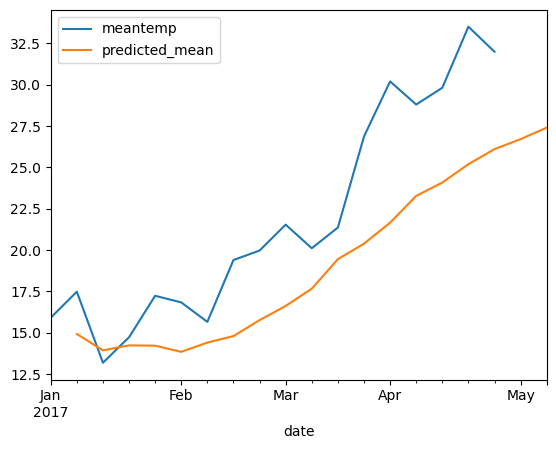

In [17]:
test.plot(legend=True)
pred.plot(legend=True);

### Task-3 Build a SARIMA model 

#### Visualize the decomposed components of the data.

In [18]:
from statsmodels.tsa.seasonal import seasonal_decompose

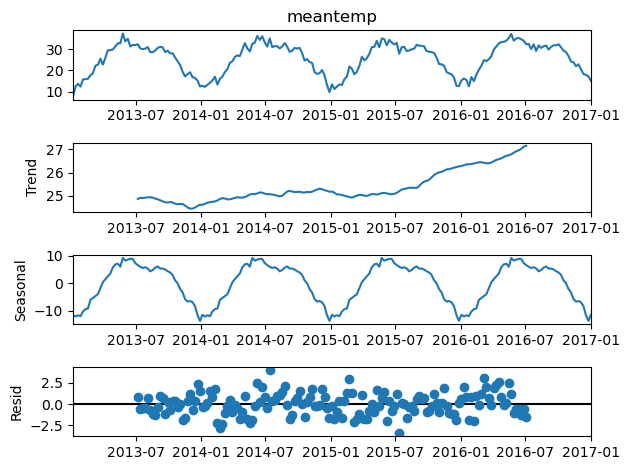

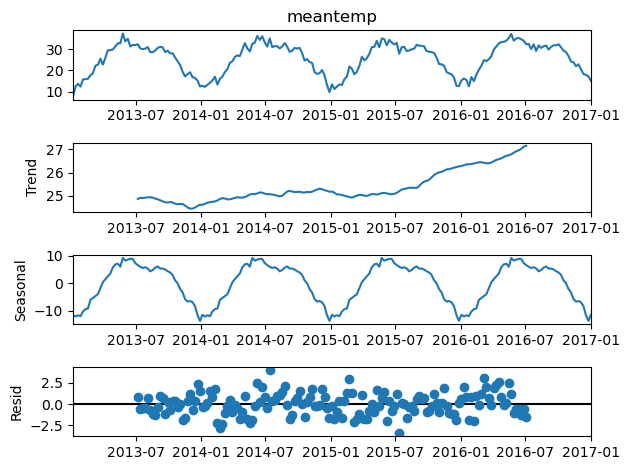

In [19]:
seasonal_decompose(train).plot()

#### Build the SARIMA model

In [20]:
p=5;q=16;d=0;
P=0;Q=0;D=0;
sarima=sm.tsa.statespace.SARIMAX(train,order=(p,d,q),seasonal_order=(P,D,Q,24)).fit()
print(sarima.summary())

                               SARIMAX Results                                
Dep. Variable:               meantemp   No. Observations:                  209
Model:              SARIMAX(5, 0, 16)   Log Likelihood                -422.160
Date:                Wed, 01 Mar 2023   AIC                            888.321
Time:                        14:55:21   BIC                            961.852
Sample:                    01-06-2013   HQIC                           918.050
                         - 01-01-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3786      0.286     -1.322      0.186      -0.940       0.183
ar.L2          0.1418      0.205      0.692      0.489      -0.260       0.544
ar.L3          0.0961      0.241      0.399      0.6

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


#### 3) Fore cast the future data using the model

In [21]:
fcast=sarima.predict(start=len(train),end=len(train)+17)
fcast

2017-01-08    14.781619
2017-01-15    13.609875
2017-01-22    13.413537
2017-01-29    13.034937
2017-02-05    12.352711
2017-02-12    12.231853
2017-02-19    11.498153
2017-02-26    11.311909
2017-03-05    11.014957
2017-03-12    10.688111
2017-03-19    10.819827
2017-03-26    10.154071
2017-04-02    10.004013
2017-04-09    10.181896
2017-04-16    10.066437
2017-04-23     9.656203
2017-04-30     9.548885
2017-05-07     9.508615
Freq: W-SUN, Name: predicted_mean, dtype: float64

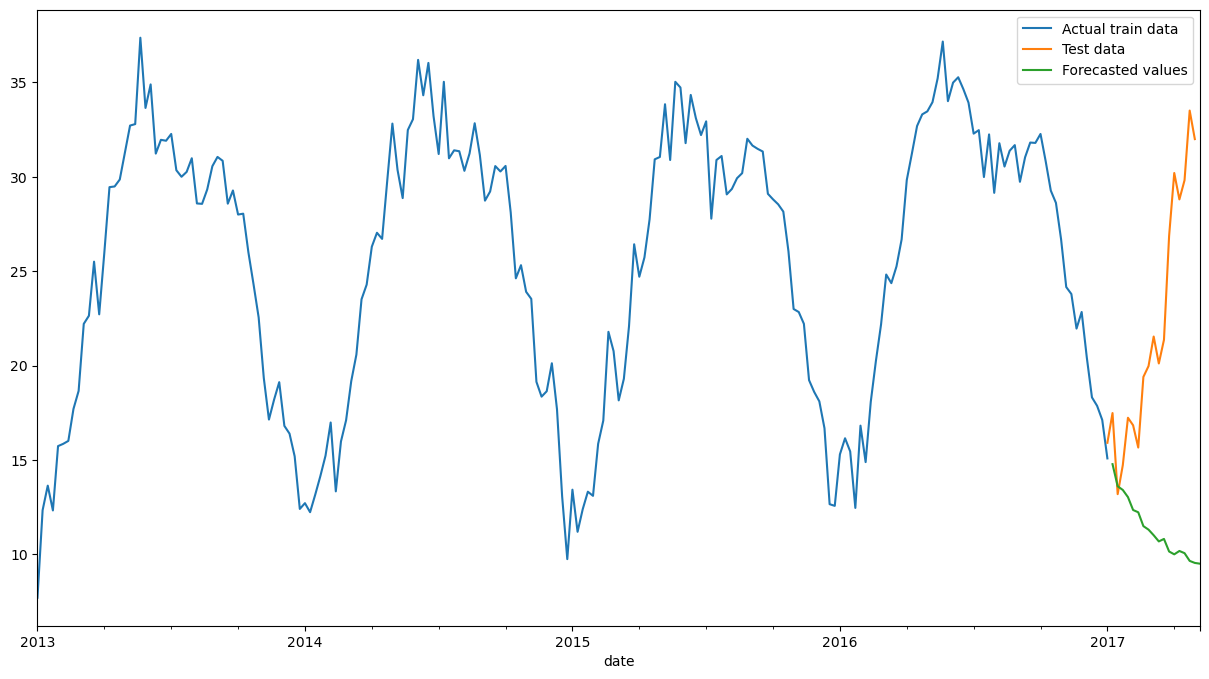

In [22]:
train.plot(figsize=(15,8),legend=True,label='Actual train data')
test.plot(legend=True,label='Test data')
fcast.plot(legend=True,label='Forecasted values');

#### Evaluation of the model

In [23]:
from sklearn.metrics import mean_squared_error

In [24]:
mse=mean_squared_error(test,fcast)
print('RMSE :',np.sqrt(mse))

RMSE : 13.08224665865837
